### Hello and welcome!

I created a Multilayer Perceptron Model for a Regression model using the Iris dataset.
I predicted the Petal Length which is a numerical column.
Video : https://www.youtube.com/watch?v=YuiEw-VN-74&ab_channel=pyhind

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


**Retrieving Data**

In [3]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**Shape of data**

In [5]:
df.shape

(150, 6)

**Setting Id as Index**

In [6]:
df.set_index('Id', inplace=True)

In [7]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [8]:
one_hot = pd.get_dummies(df['Species'])
# Drop column B as it is now encoded
df = df.drop('Species',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
Id,,,,,,,
1,5.1,3.5,1.4,0.2,1,0,0
2,4.9,3.0,1.4,0.2,1,0,0
3,4.7,3.2,1.3,0.2,1,0,0
4,4.6,3.1,1.5,0.2,1,0,0
5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,0,0,1
147,6.3,2.5,5.0,1.9,0,0,1
148,6.5,3.0,5.2,2.0,0,0,1


**Describing data**

In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,0.333333,0.333333,0.333333
std,0.828066,0.433594,1.764420,0.763161,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


**Data visualisation**

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>,
        <Axes: title={'center': 'PetalLengthCm'}>],
       [<Axes: title={'center': 'PetalWidthCm'}>,
        <Axes: title={'center': 'Iris-setosa'}>,
        <Axes: title={'center': 'Iris-versicolor'}>],
       [<Axes: title={'center': 'Iris-virginica'}>, <Axes: >, <Axes: >]],
      dtype=object)

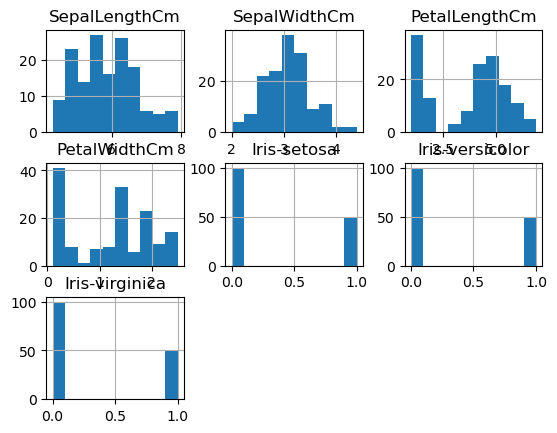

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(bins=10)


In [11]:
data = np.array(df)

data

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

We can see how the data is distributed clearly using histograms.

Let's try to predict something here. for example SepalLengthCm

In [14]:
y = data[:,0]

y

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [16]:
y.shape

(150,)

In [15]:
X = data[:,1:len(data)]

X

array([[3.5, 1.4, 0.2, 1. , 0. , 0. ],
       [3. , 1.4, 0.2, 1. , 0. , 0. ],
       [3.2, 1.3, 0.2, 1. , 0. , 0. ],
       [3.1, 1.5, 0.2, 1. , 0. , 0. ],
       [3.6, 1.4, 0.2, 1. , 0. , 0. ],
       [3.9, 1.7, 0.4, 1. , 0. , 0. ],
       [3.4, 1.4, 0.3, 1. , 0. , 0. ],
       [3.4, 1.5, 0.2, 1. , 0. , 0. ],
       [2.9, 1.4, 0.2, 1. , 0. , 0. ],
       [3.1, 1.5, 0.1, 1. , 0. , 0. ],
       [3.7, 1.5, 0.2, 1. , 0. , 0. ],
       [3.4, 1.6, 0.2, 1. , 0. , 0. ],
       [3. , 1.4, 0.1, 1. , 0. , 0. ],
       [3. , 1.1, 0.1, 1. , 0. , 0. ],
       [4. , 1.2, 0.2, 1. , 0. , 0. ],
       [4.4, 1.5, 0.4, 1. , 0. , 0. ],
       [3.9, 1.3, 0.4, 1. , 0. , 0. ],
       [3.5, 1.4, 0.3, 1. , 0. , 0. ],
       [3.8, 1.7, 0.3, 1. , 0. , 0. ],
       [3.8, 1.5, 0.3, 1. , 0. , 0. ],
       [3.4, 1.7, 0.2, 1. , 0. , 0. ],
       [3.7, 1.5, 0.4, 1. , 0. , 0. ],
       [3.6, 1. , 0.2, 1. , 0. , 0. ],
       [3.3, 1.7, 0.5, 1. , 0. , 0. ],
       [3.4, 1.9, 0.2, 1. , 0. , 0. ],
       [3. , 1.6, 0.2, 1.

In [13]:
m,n = X.shape

m,n

(150, 6)

In [14]:
y.shape

(150,)

In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [16]:
n

6

In [19]:
model = Sequential()
model.add(Dense(150, input_dim=6, activation= "relu"))
model.add(Dense(150, activation= "relu"))
model.add(Dense(1))

In [20]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X, y, epochs=20)

Epoch 1/20
5/5 [==============================] - 1s 5ms/step - loss: 29.1560 - mean_squared_error: 29.1560
Epoch 2/20
5/5 [==============================] - 0s 3ms/step - loss: 11.0277 - mean_squared_error: 11.0277
Epoch 3/20
5/5 [==============================] - 0s 3ms/step - loss: 2.6245 - mean_squared_error: 2.6245
Epoch 4/20
5/5 [==============================] - 0s 2ms/step - loss: 0.4371 - mean_squared_error: 0.4371
Epoch 5/20
5/5 [==============================] - 0s 3ms/step - loss: 1.3429 - mean_squared_error: 1.3429
Epoch 6/20
5/5 [==============================] - 0s 3ms/step - loss: 1.1920 - mean_squared_error: 1.1920
Epoch 7/20
5/5 [==============================] - 0s 2ms/step - loss: 0.3916 - mean_squared_error: 0.3916
Epoch 8/20
5/5 [==============================] - 0s 2ms/step - loss: 0.1985 - mean_squared_error: 0.1985
Epoch 9/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2807 - mean_squared_error: 0.2807
Epoch 10/20
5/5 [=========================

In [21]:
pred_train= model.predict(X)

pred_train

5/5 [==============================] - 0s 2ms/step


array([[5.061821 ],
       [4.520242 ],
       [4.699009 ],
       [4.6656137],
       [5.1711698],
       [5.6081586],
       [4.9547086],
       [4.988134 ],
       [4.4140873],
       [4.665838 ],
       [5.3153906],
       [5.023571 ],
       [4.5204635],
       [4.410717 ],
       [5.5523133],
       [6.093348 ],
       [5.476732 ],
       [5.0636907],
       [5.497133 ],
       [5.4268217],
       [5.062512 ],
       [5.3198066],
       [5.046669 ],
       [4.9563293],
       [5.140723 ],
       [4.5984945],
       [5.0275345],
       [5.097259 ],
       [4.9526963],
       [4.8109856],
       [4.7047615],
       [4.9920363],
       [5.756128 ],
       [5.8358684],
       [4.665838 ],
       [4.665857 ],
       [5.028326 ],
       [4.665838 ],
       [4.4817057],
       [4.988134 ],
       [5.0308256],
       [3.7372258],
       [4.699009 ],
       [5.1403675],
       [5.5699177],
       [4.5208416],
       [5.4598045],
       [4.7344465],
       [5.3153906],
       [4.843571 ],


In [22]:
y

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [24]:
print(pred_train[0], y[0])
print(pred_train[1], y[1])
print(pred_train[2], y[2])
print(pred_train[3], y[3])
print(pred_train[4], y[4])


print(pred_train[100], y[100])
print(pred_train[101], y[101])
print(pred_train[102], y[102])


[5.061821] 5.1
[4.520242] 4.9
[4.699009] 4.7
[4.6656137] 4.6
[5.1711698] 5.0
[7.269028] 6.3
[6.1029954] 5.8
[6.959577] 7.1


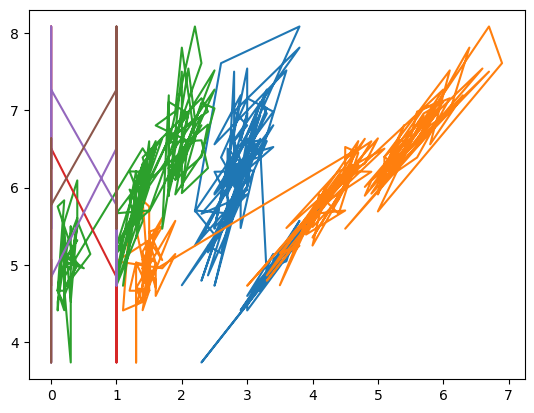

In [26]:

plt.plot(X,pred_train)

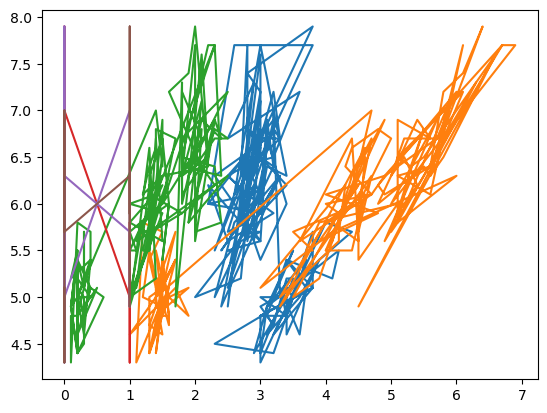

In [27]:
plt.plot(X,y)

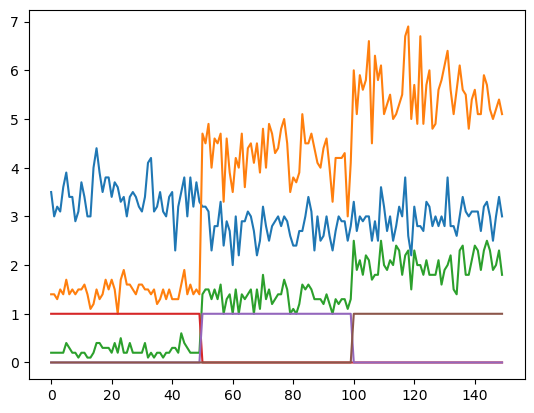

In [28]:
plt.plot(X)

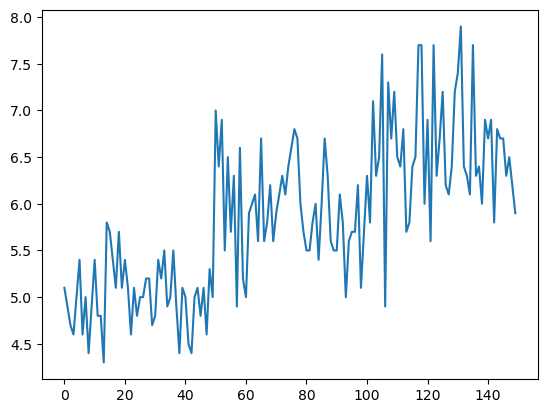

In [29]:
plt.plot(y)

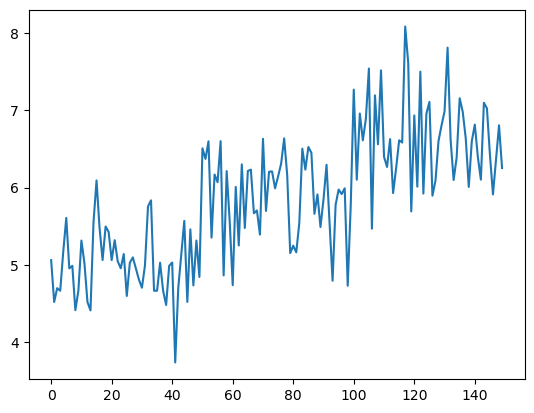

In [30]:
plt.plot(pred_train)

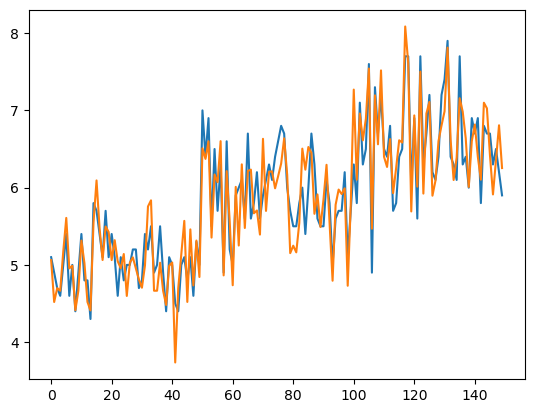

In [34]:
plt.plot(y)
plt.plot(pred_train)